# Całkowanie numeryczne

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
def f1(x):
    return np.exp(-x**2)*np.log(x)**2

def f2(x):
    return 1/(x**3-2*x-5)

def f3(x):
    return x**5*np.exp(-1*x)*np.sin(x)

def f4(x, y): #0<=x<=1, 0<=y<=1-x
    return 1/((np.sqrt(x+y))*(1+x+y))

def f5(x, y): #-2<=x<=3, -5<=y<=5
    return x**2+y**2

## Złożona kwadratura Simpsona

In [3]:
def simpson(x, y, a, b):
    if x.shape[0] % 2 == 0:
        raise ValueError("x must be odd length")
    dx = (b-a)/(x.shape[0]-1)
    S = dx/3. * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

In [4]:
a = 2.5
b = 10.
N = 50
x = np.linspace(a,b,N+1)

In [5]:
%timeit simpson(x, f1(x), a, b)
%timeit integrate.quad(f1, a, b)
print(f'Integrals differnce equals: {abs(simpson(x, f1(x), a, b)-integrate.quad(f1, a, b)[0])}')

33.6 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
59.7 µs ± 882 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Integrals differnce equals: 1.6686207937903139e-07


In [6]:
%timeit simpson(x, f2(x), a, b)
%timeit integrate.quad(f2, a, b)
print(f'Integrals differnce equals: {abs(simpson(x, f2(x), a, b)-integrate.quad(f2, a, b)[0])}')

24.4 µs ± 908 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
51.7 µs ± 7.67 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Integrals differnce equals: 4.374582586856579e-05


In [7]:
%timeit simpson(x, f3(x), a, b)
%timeit integrate.quad(f3, a, b)
print(f'Integrals differnce equals: {abs(simpson(x, f3(x), a, b)-integrate.quad(f3, a, b)[0])}')

32.9 µs ± 8.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
73 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Integrals differnce equals: 3.815632049963824e-05


## Oznaczone całki podwójne

In [9]:
ax = -3.
bx = 3.
ay = -5.
by = 5.
Nx = 100
Ny = 100
x = np.linspace(ax,bx,Nx+1)
y = np.linspace(ay,by,Ny+1)

Można łatwo analitycznie policzyć, że dokładna wartość całki wynosi $680$.

In [16]:
def plot_compare(f, N_max=2000):
    global grid
    N = np.arange(2, N_max, 4)
    rel_error = []
    similar = []
    exact = 680.
    adaptive_error = integrate.dblquad(f5, ax, bx, ay, by)[1]
    for n in N:
        x = np.linspace(ax,bx,n+1)
        y = np.linspace(ay,by,n+1)
        grid = get_simpsons_coef(n, n)
        sim = f(x, y, f5, ax, bx, ay, by)     
        rel_error.append(abs(exact-sim)/exact)
        if abs(rel_error[-1]-adaptive_error) < 10**(-5):
            similar.append(n)
    plt.plot(N, rel_error)
    return similar

def get_simpsons_coef(Nx, Ny):
    grid = np.ones((Nx+1, Ny+1))
    grid[1::2] *=4 
    grid[2:-1:2] *=2
    grid[:,1::2] *=4 
    grid[:,2:-1:2] *=2
    return grid

In [17]:
def trapez(x, y, a, b):
    if x.shape[0] % 2 == 0:
        raise ValueError("x must be odd length")
    dx = (b-a)/(x.shape[0]-1)
    S = dx/2. * np.sum(y[0:-1] + y[1:])
    return S

In [18]:
def trapez_2d(x, y, f, ax, bx, ay, by):
    f_xy = f(x.reshape(-1, 1), y.reshape(1, -1))
    return trapez(x, [trapez(y, f_, ay, by) for f_ in f_xy], ax, bx)

In [19]:
trapez_2d(x, y, f5, ax, bx, ay, by)

680.1360000000001

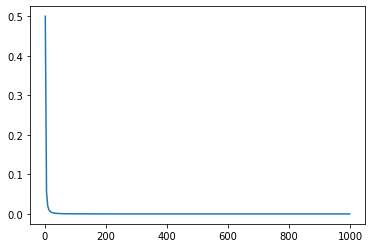

In [20]:
similar0 = plot_compare(trapez_2d, N_max=1000)

Obserwowana zależność sugeruje, że $error \sim \frac{1}{N^2}$, co jest zgodne z teoretycznymi przewidywaniami.

In [22]:
print(f'Błąd przypomina ten z metody integrate.dblquad dla N > {similar0[0]}')

Błąd przypomina ten z metody integrate.dblquad dla N > 450


Wykonano również całkowanie metodą Simpsona w 2D na dwa sposoby.
Wykorzystano tablicę współczynników oraz dwukrotne liczenie pojedyńczej całki.

In [23]:
def simpson_2d(x, y, f, ax, bx, ay, by):
    if x.shape[0] % 2 ==0 or y.shape[0] % 2 == 0:
        raise ValueError("vectros must be odd length")
    dx = (bx-ax)/(x.shape[0]-1)
    dy = (by-ay)/(y.shape[0]-1)
    f_xy = f(x.reshape(-1, 1), y.reshape(1, -1))
    S = dx*dy/9. * np.sum(f_xy*grid)
    return S

grid = get_simpsons_coef(Nx, Ny)

In [24]:
def simpson_2d_double(x, y, f, ax, bx, ay, by):
    f_xy = f(x.reshape(-1, 1), y.reshape(1, -1))
    return simpson(x, [simpson(y, f_, ay, by) for f_ in f_xy], ax, bx)

In [25]:
simpson_2d(x, y, f5, ax, bx, ay, by)

680.0

In [26]:
simpson_2d_double(x, y, f5, ax, bx, ay, by)

680.0

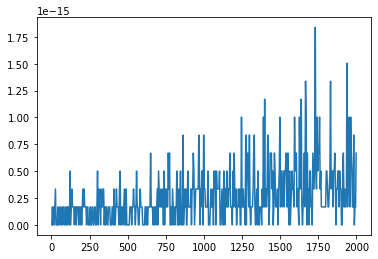

In [27]:
similar1 = plot_compare(simpson_2d)

In [28]:
len(similar1)

500

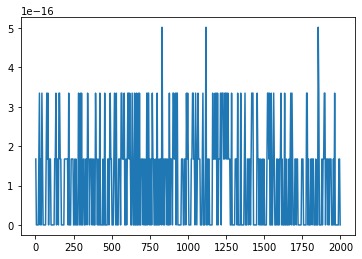

In [29]:
similar2 = plot_compare(simpson_2d_double)

In [30]:
len(similar2)

500

W obu przypadkach błąd jest bardzo mały i zawsze bardzo podobny do błędu otrzymanego przy funkcji bibliotecznej. Jendak dla funkcji licoznej metodą tablicową zaobserwowano wzrost błędu wraz ze wzrostem N. Rozbieżność może być spowodowana błędem numerycznym spowodowanym faktem, że $\Delta x$ i $\Delta y$ stają się od pewnego N bardzo małe. Teoretycznie powinniśmy zaobserwować, że $error \sim \frac{1}{N^4}$